# <center> Controllable text generator of spooky authors </center>
### <center> Lucas Hideki Ueda </center>
#### <center> University of Campinas, Eletrical and Computational Engeeniring Faculty, lucashueda@gmail.com </center>
<br>
<br>



##### <center> Abstract

Abstract— Natural   Language   Processing   (NLP)   have   hada   huge   transformation   since   Transformer   was   introduced. Many   NLP   tasks   have   state   of   the   art   solutions   basedon  these  transformer’s  methods.  In  this  project  we  aim  touse   a   Transformer-based   architecture   to   produce   a   modelthat  can  generate  controllable  texts  from  3  spooky  authors (Edgar  Allan  Poe,  HP  Lovecraft  and  Marry  Shelley).  Our architecture  is  based  on  Variational  Autoencoder  (VAE)  with normalizing flows and   the   Reformer,   a   memory   efficient Transformer-based  architecture.  ***Here  i  intend  to  put  some phrase  about  results  and  final  summarized  conclusion***.  Our source  code  is  publicly  available  at https://github.com/lucashueda/reproducible_research . 

**Keywords:   language   modeling,   variational   autoencoder,normalizing  flows,  deep  learning,  spooky  author.**


### 1. Introduction

Language modelling tries to estimate a probability density function that can predict next token by the past ones [1]. This technique allows us to represent words in a latent space by using dense vectors with fixed dimensional. This dense vector is used in the literature with two main purposes, the first is a better representation of a phrase intead of an one hot vector and the second one is to control latent meanings by finding patterns in this latent space ([2], [4]).

Text   generation   it’s   a   very   hard   task   in   NLP because of its "human" nature, it is very hard to find a way to generate text as a human since there is no specific pattern known in humans generated texts. Text DE-Generation  is  yet  a  big  problem which makes algorithms very repetitive and with no reasonable meaning of the generated texts [3]. Additionally there is no  main way  to  validate  a  text  generator  in  terms  of  reasonable and  coherence  with  human  language  in  an  automatic  way. Additionally to control the text that is generated is one more problem in this task.

In this work we try to make a fully text generator system that is able to produce reasonable texts conditioned by an author embedding, i.e., by given as input an initial text and a author embedding the system is able to produce text as this target author. We use an dataframe that has texts from 3 spooky authors, Edgar Allan Poe, H.P. Lovecraft and Marry Shelley. This is a dataframe from a kaggle competition and has a lot of sentences of these 3 authors, wi will use this dataframe to extract author's embeddings and generate our proposed method.



This   work   is   organized   as   follows:   Section   1   is   the introduction, Section 2 we describe the methods that motives our  proposed  method,  in  Section  3  we  describe the experiments made in the dataset and the architectures tested,  Section  4  and  5  we  discuss  and conclude our work. Further sections are just the source code and acknowledgements.


### 2. Methods

In this section we are going to summarize the motivations of our proposed method.

#### 2.1. Language Modeling

Language   modelling   is   the   process   to   estimate   the probability  density  function  that  can  predict  a  token  givenan  array  of  past  tokens  [1].  This  approach  can  be  used  to generate tokens, but the more gain about this technique was about  word  representation  [2]  where  a  dense  vector  could represent better a token than its one-hot vector, it allows a lot of evolution in NLP with GloVE, ElMO and more recently with Transformers. In  this  project   we  are  going  to  use  the   meaning  of language  modelling  to  generate  our  tokens,  we  could  use a   sequence-to-sequence   modelling   instead   of   per   token generation  but  for  isolated  effects  purposes  we  choose  towork  with  a  simple  way  to  do  the  token  generation.  Also we will do ablation using top-k and nucleus sampling [3] as decoding metodologies that are the best for our purpose.

#### 2.2. Variational Autoencoder

Autoencoders  try  to  make  a  dense  representation  of  a sparse vector in order to get latent information turns results better.  Variational  Autoencoders  [4]  do  this  by  minimizing KL loss in order to fit two N-dimensional vectors,μ and σ,the mean and standard deviation, respectively, of a Gaussian distribution that represent data in a lower dimension. VAE’sare getting very good results in controlling speech synthesis[5], [6]. One weak of VAE’s are the fact that they try to fit agaussian distribution, but you can’t guarantee that the better representation is a gaussian distribution.

#### 2.3. Normalizing flows

Normalizing flows is a method that trys to by consecutives invertible functions turns a simple distribution in a complex one   [7].   It   will   be   used   to   generate   a   more   complex distribution  from  the  output  of  the  VAE’s  layer  and  fit  amore reasonable distribution of the latent representation.

#### 2.4. Reformer

Reformer  is  an  efficient  implementation  of  Transformer[8].  It  used  reversible  layers  and  LSH  attention  that  enable the architecture to not require a lot of memory and don’t loose too  much  performance  [9].  It  will  be  used  as  our  language modelling base.

#### 2.5. Evaluation

We choose 3 metrics to evaluate our model, the two first will  evaluate  how  well  our  model  is  generating  tokens  and the  last  one  will  measure  how  well  related  the  generated text  is  correlate  with  the  specific  author.  The  first  one  is Perplexity [10] which measure how well distributed is outlogits compared to the right token, is will primarily used to training  evaluation  metric  but  will  also  be  reported  asa  comparable  metric  of  generation  quality.  BLEU  [11]  will also be used because of it’s sense of right prediction of next token. The last one will is an attempt to measure how well our text is correlated with the target author, it is based on the Mean Reciprocal Rank (MRR) [12] used a lot in information retrieval  tasks,  the  idea  of  MRR  is  to  measure  how  well ranked  is  some  string  to  a  target  list  of  true  strings.  We change a little bit this metric to measure the rank of the text generated compared with a pre defined set of most common words used to each author.

### 3. Experiments

In this section we describe all of our experiments, the first one consist in an analysis on the dataset and the next two describing the models and the experiments dones. 

#### 3.1. Experiments: Spooky author dataset

The dataset is provided by a kaggle competition that had as objective to classify a text with one of the three authors by texts, we will use the same dataset but for generative modelling purposes. It has 19579 observations such that almost a third by each author (Figure 1) and the number of words (tokens) goes from 2 to 861.

In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from collections import Counter

In [2]:
# Reading dataset
base = pd.read_csv("train/train.csv")

In [3]:
# Visualizing dataset
base.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
# Printing how many rows (observations) the dataset has
print(f"The dataset has {base.shape[0]} observations.")

The dataset has 19579 observations.


In [5]:
# Generating auxiliar column that represent how any words have in each phrase
base['text_len'] = base['text'].apply(lambda x: len(x.split()))

In [6]:
print(f"The mean words in texts is {base['text_len'].mean()}, with minimum of {base['text_len'].min()} words \
and maximum of {base['text_len'].max()} words")

The mean words in texts is 26.730476530977068, with minimum of 2 words and maximum of 861 words


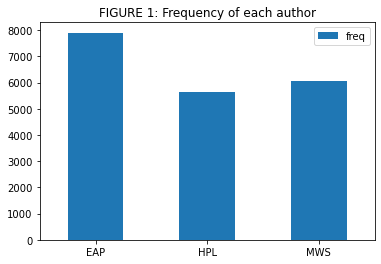

In [7]:
base['freq'] = 1
count_per_author = base.groupby('author').agg({'freq': 'count'}).reset_index()
count_per_author.plot(kind='bar')
plt.title('FIGURE 1: Frequency of each author')
plt.xticks(np.arange(3), count_per_author['author'], rotation = 0)
plt.show()

Our hypothesis using this dataset is that different authors intend to use different words (Figures 2,3,4)

In [8]:
def cloud(text, title):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(8.0,8.0)    #(6.0,4.0)
    #mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
    wordcloud = WordCloud(width=1400, height=800,
                          background_color='white',
                          stopwords=stopwords,
                         ).generate(" ".join(text))
    
    # Output Visualization
    
    plt.figure(figsize=(10,5), facecolor='w')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=50,color='k')

None


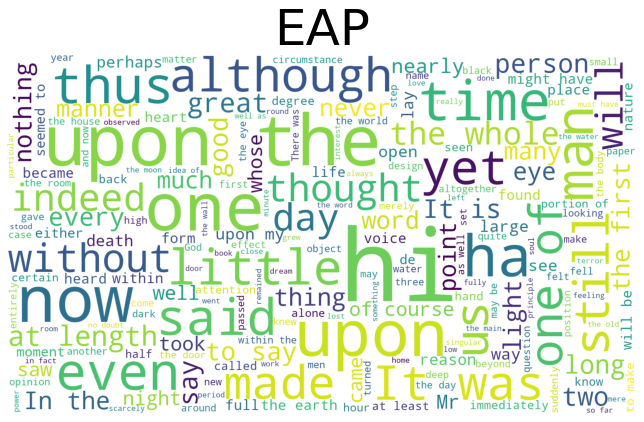

In [9]:
x = 'EAP'
print(cloud(base[base.author == x]['text'].values,x))

None


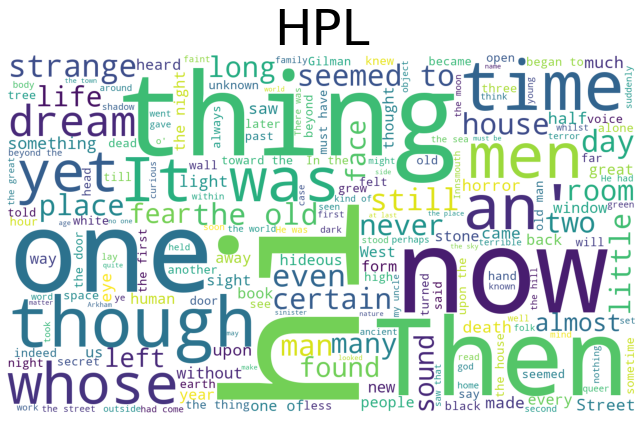

In [10]:
x = 'HPL'
print(cloud(base[base.author == x]['text'].values,x))

None


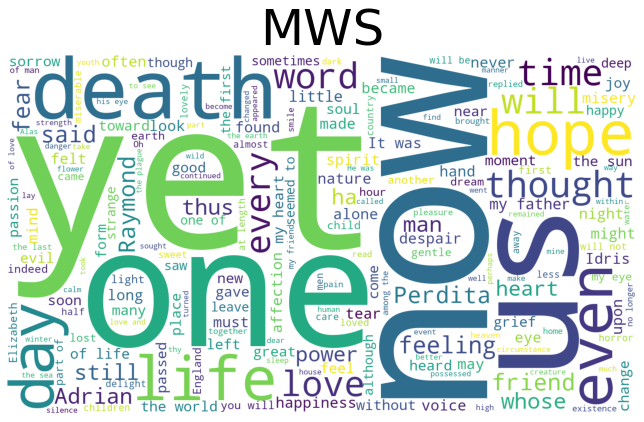

In [11]:
x = 'MWS'
print(cloud(base[base.author == x]['text'].values,x))

#### 3.2. Experiments: Vanilla model

As a baseline we propose a simple Vanilla model that take as input a text and an one-hot vector that indicates what is the target author. With this baseline we intend to verify the real difference by our main approach in front of a simple one.

#### 3.3. Experiments: Proposed model

Our proposed method is based in a Transformer variation that  is  memory  efficient,  the  Reformer.  We  add  an  author embedding  together  with  the  first  N  tokens  to  generate  a new  token as show in Figure 5.  We  perform  ablations  using  top-k  and  nucleus sampling decoders and evaluate using our own metric.

<img src= "../figures/proposed_figure.png">

Figure 5: The proposed method. The VAE architecture is trained separeted to generate the VAE encoder output and concatenate in Transformer encode.

### 4. Discussion

Our ablations on our proposed method shows that a Transformer approach reaches better results, so as with the embedding modelling, VAE's get better latent representations and normalizing flows helps to avoid only gaussian distribution.

### 5. Conclusion

This work shows that is possible to build an entire controlled system that generate text conditioned to an specific author.

### 6. Source code

All the code used to do this project is available in https://github.com/lucashueda/reproducible_research.

### 7.  Acknowledgements

This project is part of Computational Reproducible Research course at Unicamp (1S2020).

### References

[1]  P. V. C. J. Yoshua Bengio, R ́ejean Ducharme, “A neural probabilistic language    model,” online:http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf, 2003.

[2]  G. C. J. D. Tomas Mikolov, Kai Chen, “Efficient estimation of word representations  in  vector  space,” online:https://arxiv.org/abs/1301.3781, 2003.

[3]  L.  D.  M.  F.  Y.  C.  Ari  Holtzman,  Jan  Buys,  “The  curious  case of neural text degeneration,” online:https://arxiv.org/abs/1904.09751, 2019.

[4]  M. W. Diederik P Kingma, “Auto-encoding variational bayes,” online:https://arxiv.org/abs/1312.6114, 2013.

[5]  Y.  M.  Kei  Akuzawa,  Yusuke  Iwasawa,  “Expressive  speech  synthesis via   modeling   expressions   with   variational   autoencoder,” online:https://arxiv.org/abs/1804.02135, 2018.

[6]  N. P. J. L.-T. Vatsal Aggarwal, Marius Cotescu and R. Barra-Chicote,“Using   vaes   and   normalizing   flows   for   one-shot   text-to-speech synthesis  of  expressive  speech,” online:https://arxiv.org/pdf/1911.12760.pdf, 2020.

[7]  S.    M.    Danilo    Jimenez    Rezende,    “Variational    inference    with normalizing flows,” online:http://proceedings.mlr.press/v37/rezende15.pdf, 2015.

[8]  N. P. J. U.-L. J. A. N. G. L. K. I. P. Ashish Vaswani, Noam Shazeer,“Attention  is  all  you  need,” online:https://arxiv.org/abs/1706.03762, 2017.

[9]  A.   L.   Nikita   Kitaev,   Łukasz   Kaiser,   “Reformer:   The   efficient transformer,” online:https://arxiv.org/abs/2001.04451,2020.

[10]  R.  R.  Stanley  Chen,  Douglas  Beeferman,  “Evaluation  metrics  for language models,” online:https://www.cs.cmu.edu/ ̃roni/papers/eval-metrics-bntuw-9802.pdf, 2001.

[11]  T. W. Kishore Papineni, Salim Roukos and W.-J. Zhu, “Bleu: a method for automatic evaluation of machine translation,” online:https://www.aclweb.org/anthology/P02-1040.pdf, 2002.

[12]  N.  Craswell,Mean Reciprocal Rank,  pp.  1703–1703.   Boston,  MA:Springer US, 2009.